### Strategy to Boost Supermarket Sales in January

As the manager of a supermarket in Surabaya, I find myself at a crossroads as we step into January. The new year has just begun, and I am eager to understand how my supermarket has been performing. My office is filled with stacks of transaction data from our customers, brimming with numbers, percentages, and seemingly endless combinations of products. Yet, I feel lost amidst the overwhelming data.

The challenge is clear: I need **insights on what is truly happening in my supermarket**. What are the purchasing patterns of my customers? Which products are flying off the shelves, and which ones are barely noticed? More importantly, **how can I use this information to optimize the layout of the store and boost sales this year**?

In January, **the store layout is the first thing I want to focus on**. Customers are navigating through the aisles, but I want to ensure they’re being guided to the right places. I wonder: Should I place complementary products closer together? Should I create specific zones to attract customers? For instance, should shampoos be next to toothpaste or near body soaps? Should snacks and drinks be closer together to encourage impulse buys?

The only thing I have right now is the [raw transaction data](https://raw.githubusercontent.com/michellechandraa/TutorDataMining/refs/heads/main/Supermarket-December-2017.xlsx). It tells me what customers bought, but I need help deciphering it. **Are there certain product combinations that people frequently buy together?** For example, do people who buy detergents also pick up fabric softeners? Do snacks and beverages have a strong pairing trend?

I need your expertise to dig into this data and uncover patterns. Once we understand what products customers often buy together, I can rearrange the store layout to make it more intuitive and appealing. This way, I can improve the shopping experience for my customers while also increasing the chances of cross-selling and boosting sales.

Let’s uncover the story behind the numbers and make data-driven decisions that will set my supermarket up for success in this new year. Help me turn this chaotic dataset into a clear strategy that drives results!

### Grading

1. Understanding the Data (50 points)


*   Key Metrics (0/10/15/25 points): Identifies useful insights, eg: top-selling products, etc.
*   Seasonal Insights (0/10/15/25 points): Explains trends for January, highlighting any seasonal demands or anomalies in customer behavior.
<br>
<br>

2. Recommending Layout Improvements (50 points)

*   Market Basket Analysis Insights (0/10/15/25 points): Uses association rules to determine logical groupings of products.
*   Placement Ideas (0/10/15/25 points): Provides actionable layout changes idea to increase cross-selling opportunities, such as adjusting the location of high-demand complementary items, eg:
If "Shampoo" is frequently bought with "Soap," they should be placed near each other.




In [76]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.dates as mdates

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [77]:
df = pd.read_excel('https://raw.githubusercontent.com/calvct/data-mining-w2/800be23a94eef657a8ced492dd2a8824b938aed8/Supermarket-December-2017.xlsx')
df.head()

# import dataset dan menampilkan 5 rows pertama

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,KD_SBR,TP_TRN,KDSUP,KAS,TRN_DK,GDG,GGD,KDSLS,KEL,ITEM,...,DEP_SWA,GON,KONS,POST_STOK,STATUS,TP_ADJ,USER,TANGGAL,JAM,LAMA_CRD
0,IN,JUL,NaN,6.0,K,A,AREA,NaN,KERTAS,39390.0,...,NaN,NaN,NaN,NaN,NaN,S,MIA,2017-01-02,08:12:02,NaN
1,IN,JUL,NaN,6.0,K,A,AREA,NaN,BTL/DOT,13108.0,...,NaN,NaN,NaN,NaN,NaN,S,MIA,2017-01-02,08:24:51,NaN
2,IN,JUL,NaN,6.0,K,A,AREA,NaN,MUSTIKA,5644.0,...,NaN,NaN,NaN,NaN,NaN,S,MIA,2017-01-02,08:28:18,NaN
3,IN,JUL,NaN,6.0,K,A,AREA,NaN,SABUN.C,7273.0,...,NaN,NaN,NaN,NaN,NaN,S,MIA,2017-01-02,08:28:22,NaN
4,IN,JUL,NaN,6.0,K,A,AREA,NaN,LULURMD,12168.0,...,NaN,NaN,NaN,NaN,NaN,S,MIA,2017-01-02,08:28:20,NaN


In [78]:
df.info()

# menampilkan info dari dataset, seperti ada kolom apa saja, tipe datanya, dan jumlah data

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148489 entries, 0 to 148488
Data columns (total 61 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   KD_SBR      148486 non-null  object        
 1   TP_TRN      148486 non-null  object        
 2   KDSUP       40832 non-null   float64       
 3   KAS         136294 non-null  float64       
 4   TRN_DK      148486 non-null  object        
 5   GDG         148486 non-null  object        
 6   GGD         148486 non-null  object        
 7   KDSLS       0 non-null       float64       
 8   KEL         148486 non-null  object        
 9   ITEM        148486 non-null  float64       
 10  NAMA        148486 non-null  object        
 11  BIN         13586 non-null   float64       
 12  KDBIN       0 non-null       float64       
 13  TGL_TRANS   148486 non-null  datetime64[ns]
 14  NO_BKT      148486 non-null  object        
 15  NO_ORD      0 non-null       float64       
 16  ST

In [79]:
df.isnull().sum()\

# menampilkan kolom apa saja yang memiliki null value dan berapa jumlahnya

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0
KD_SBR,3
TP_TRN,3
KDSUP,107657
KAS,12195
TRN_DK,3
...,...
TP_ADJ,9413
USER,3
TANGGAL,3
JAM,3


In [80]:
# Menghapus kolom dari DataFrame
df.drop(['KD_SBR', 'TP_TRN', 'KDSUP', 'KAS', 'TRN_DK', 'GDG', 'GGD', 'KDSLS', 'ITEM', 'NAMA', 'BIN', 'KDBIN', 'NO_ORD', 'STS_BYR', 'SLD_AK', 'SLD_AKG', 'HRG_OLD', 'HRGBL_OLD', 'HRG_PKK', 'HRG_JUL', 'DISC', 'DISC1', 'DISC2', 'JLH_DIS', 'JLH_DIS1', 'JLH_DIS2', 'HRGJL_OLD', 'HRGJL1_OLD', 'HRGJL2_OLD', 'SUPP_OLD', 'DISB1_OLD', 'DISB2_OLD', 'PPN', 'PPN_OLD', 'PPNBM', 'PPNBM_OLD', 'KET_TRANS', 'PTS_GDG', 'PTS_KEL', 'PTS_ITEM', 'QTY_PTS', 'TRNBL', 'POST', 'TGL_OLD', 'FILLER', 'SUPPLIER', 'DEP_SWA', 'GON', 'KONS', 'POST_STOK', 'STATUS', 'TP_ADJ', 'USER', 'TANGGAL','LAMA_CRD'], axis=1, inplace=True)

# Menampilkan DataFrame yang telah diperbarui
df.head()

# menghapus beberapa kolomg yang tidak akan dipakai pada visualisasi dan analisis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,KEL,TGL_TRANS,NO_BKT,QTY,JLH_TRANS,JAM
0,KERTAS,2017-01-02,060102001,2.0,2200.0,08:12:02
1,BTL/DOT,2017-01-02,060102002,1.0,23000.0,08:24:51
2,MUSTIKA,2017-01-02,060102003,1.0,9500.0,08:28:18
3,SABUN.C,2017-01-02,060102003,1.0,6900.0,08:28:22
4,LULURMD,2017-01-02,060102003,1.0,13500.0,08:28:20


In [81]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')

df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

df.isnull().sum()

# mengisi beberapa rows yang memiliki null value dengan most_frequent data pada kolom tersebut

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0
KEL,0
TGL_TRANS,0
NO_BKT,0
QTY,0
JLH_TRANS,0
JAM,0


In [82]:
df.sort_values(by=['TGL_TRANS','NO_BKT'], ascending=True, inplace=True)
df.head()

# melakukan sort untuk mempermudah dalam visualisasi

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,KEL,TGL_TRANS,NO_BKT,QTY,JLH_TRANS,JAM
2451,WAFER,2017-01-01,010101001,1.0,1700.0,13:12:21
2452,MINUMAN,2017-01-01,010101002,1.0,2000.0,13:19:45
2453,SUSU KT,2017-01-01,010101003,1.0,52000.0,13:21:05
2454,MCEREAL,2017-01-01,010101003,1.0,6500.0,13:21:07
2455,PERMEN,2017-01-01,010101003,1.0,4200.0,13:21:09


In [83]:
df['day_name'] = pd.to_datetime(df['TGL_TRANS']).dt.day_name()
df['hour'] = pd.to_datetime(df['JAM']).dt.hour
df['day'] = pd.to_datetime(df['TGL_TRANS']).dt.day

# memisahkan day, hour, dan day name menjadi kolom baru
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-83-3f534eaa8e18>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['hour'] = pd.to_datetime(df['JAM']).dt.hour


,KEL,TGL_TRANS,NO_BKT,QTY,JLH_TRANS,JAM,day_name,hour,day
2451,WAFER,2017-01-01,010101001,1.0,1700.0,13:12:21,Sunday,13,1
2452,MINUMAN,2017-01-01,010101002,1.0,2000.0,13:19:45,Sunday,13,1
2453,SUSU KT,2017-01-01,010101003,1.0,52000.0,13:21:05,Sunday,13,1
2454,MCEREAL,2017-01-01,010101003,1.0,6500.0,13:21:07,Sunday,13,1
2455,PERMEN,2017-01-01,010101003,1.0,4200.0,13:21:09,Sunday,13,1


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


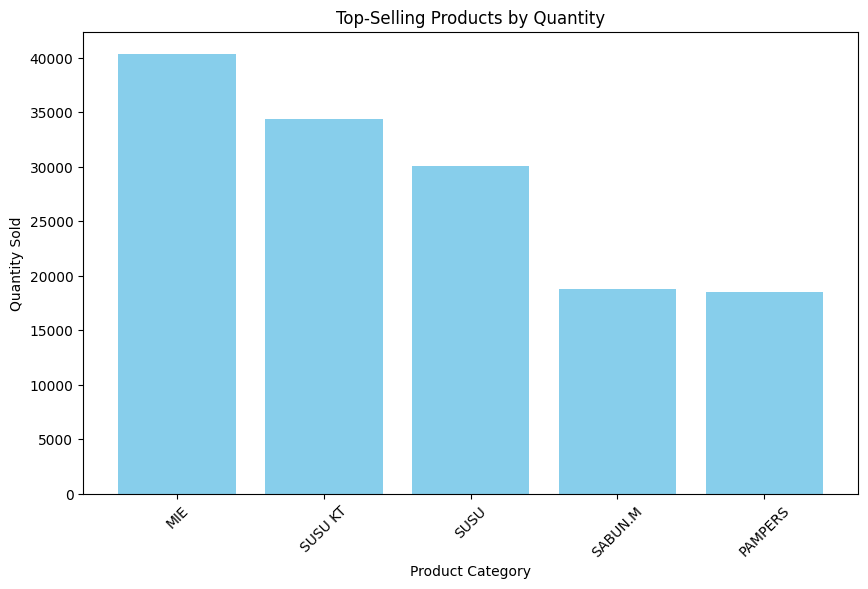

In [84]:
top_products = df.groupby('KEL').agg({'QTY': 'sum', 'JLH_TRANS': 'sum'}).reset_index()
top_products = top_products.sort_values(by='QTY', ascending=False).head(5)

plt.figure(figsize=(10, 6))
plt.bar(top_products['KEL'], top_products['QTY'], color='skyblue')
plt.title('Top-Selling Products by Quantity')
plt.xlabel('Product Category')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45)
plt.show()

# menampilkan 5 produk paling laris
# Dari grafik, 5 produk paling laris adalah Mie, Susu KT, Susu, Sabun mandi, dan Pampers. Oleh karena itu jumlah tiap produk yang dijual harus ditambahkan karena banyak customer yang membelinya.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


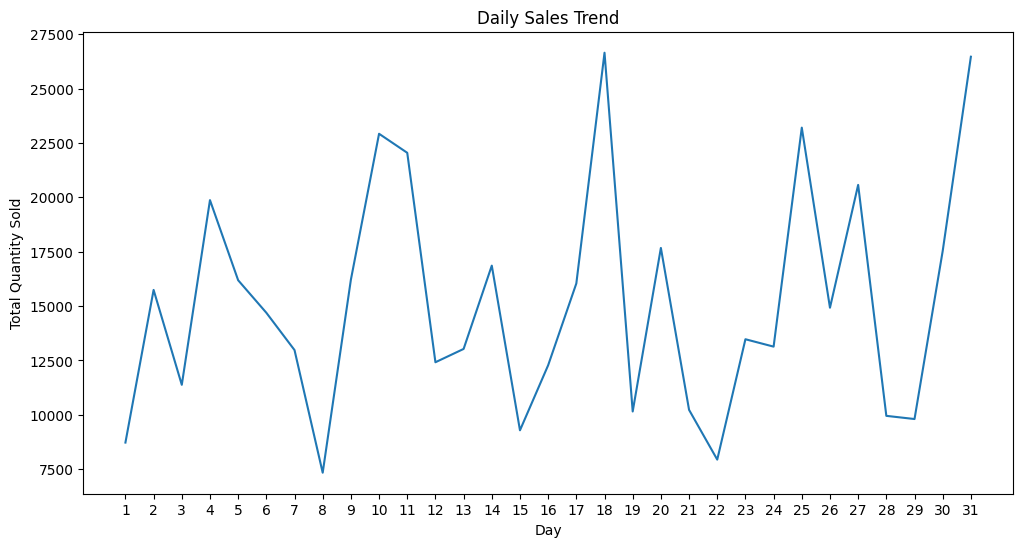

In [85]:
daily_transaction_trend = df.groupby('day')['QTY'].sum().reset_index()
plt.figure(figsize=(12, 6))
plt.plot(daily_transaction_trend['day'].astype(str), daily_transaction_trend['QTY'])
plt.title('Daily Sales Trend')
plt.xlabel('Day')
plt.ylabel('Total Quantity Sold')
plt.show()

# menampilkan jumlah produk terjual tiap harinya
# Pada tanggal 8 merupakan hari di mana produk terjual paling sedikit, dan paling banyaknya ada di tanggal 18, tetapi pada tanggal 19 langsung turun drastis.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


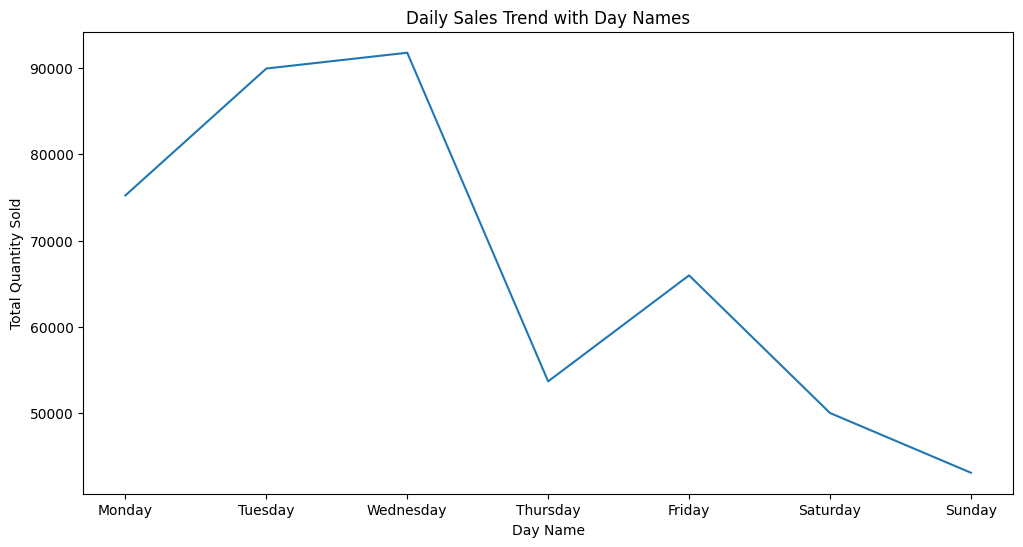

In [86]:
dayname_trend = df.groupby(['day_name'])['QTY'].sum().reset_index()
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
dayname_trend['day_name'] = pd.Categorical(dayname_trend['day_name'], categories=day_order, ordered=True)
dayname_trend = dayname_trend.sort_values('day_name')
plt.figure(figsize=(12, 6))
plt.plot(dayname_trend['day_name'], dayname_trend['QTY'])
plt.title('Daily Sales Trend with Day Names')
plt.xlabel('Day Name')
plt.ylabel('Total Quantity Sold')
plt.show()

# menampilkan total produk terjual sesuai nama hari
# Rabu menjadi hari di mana penjualan produk terbanyak sedangkan minggu memiliki total penjualan paling sedikit.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


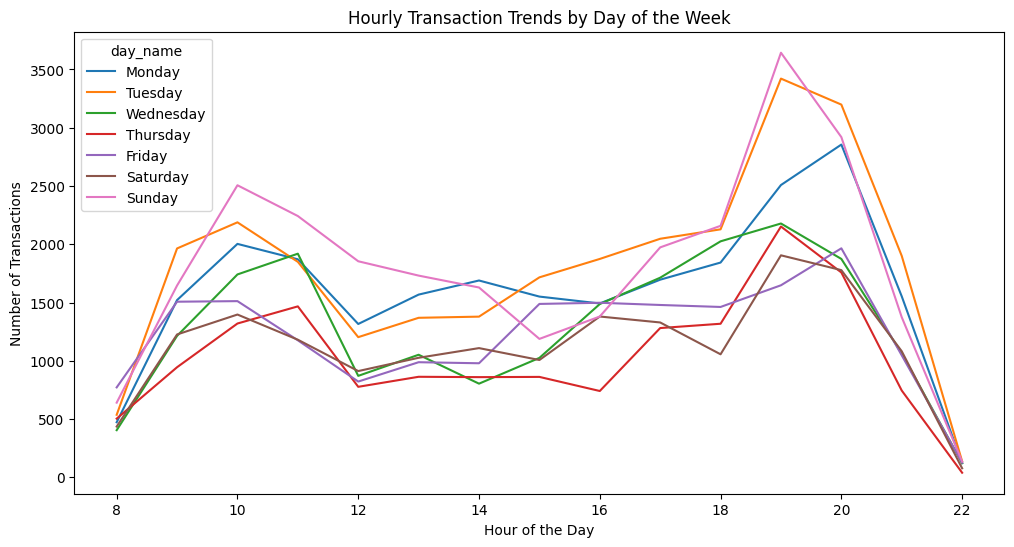

In [87]:
hour_transaction = df.groupby(['hour','day_name'])['NO_BKT'].size()
hour_table = hour_transaction.unstack()
hour_table = hour_table.fillna(0).astype(int)
hour_table = hour_table.reindex(columns=day_order)
hour_table.plot(kind='line', figsize=(12, 6), title="Hourly Transaction Trends by Day of the Week")
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Transactions')
plt.show()

# Menampilkan total transaksi untuk tiap jamnya saat supermarket dibuka
# Pukul 19 dan 20 memiliki jumlah transaksi paling banyak dibandingkan jam-jam lainnya.

In [88]:
apriori_data = pd.crosstab(df['NO_BKT'], df['KEL'])
apriori_data.head()

# membuat tabel silang antara NO_BKT dengan KEL

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


KEL,A BABY,A JAHIT,A TULIS,A.AGAR,A.DAPUR,ABON,ACNES,AGENDA,AIR.M,AKANTOR,...,VIVA,WAFER,WAFER.P,WAFERKL,WALLS,WARDAH,WONDERL,WRP,WRP LW,ZWITSAL
NO_BKT,,,,,,,,,,,,,,,,,,,,,
0001/0117,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0002/0117,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0003/0117,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0004/0117,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0005/0117,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [89]:
encoded_df = apriori_data.applymap(lambda x: 1 if x > 0 else 0)
encoded_df.head()

# mengubah data menjadi 1 dan 0

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-89-29bf9ae769f1>:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  encoded_df = apriori_data.applymap(lambda x: 1 if x > 0 else 0)


KEL,A BABY,A JAHIT,A TULIS,A.AGAR,A.DAPUR,ABON,ACNES,AGENDA,AIR.M,AKANTOR,...,VIVA,WAFER,WAFER.P,WAFERKL,WALLS,WARDAH,WONDERL,WRP,WRP LW,ZWITSAL
NO_BKT,,,,,,,,,,,,,,,,,,,,,
0001/0117,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0002/0117,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0003/0117,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0004/0117,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0005/0117,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [90]:
frequent_itemsets = apriori(encoded_df, min_support=0.02, use_colnames=True)
frequent_itemsets

# menampilkan itemset yang paling banyak terjual dengan minimum 0.02% dari total data

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.037991,(AIR.M)
1,0.032251,(ASESORS)
2,0.033590,(B DAPUR)
3,0.063600,(BISCPAK)
4,0.024106,(BTL/DOT)
5,0.032360,(COKLAT)
6,0.026593,(DDORANT)
7,0.083607,(DETERJN)
8,0.028507,(GULA)
9,0.021373,(HBL)


In [91]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
top_rules = rules.sort_values(by=["confidence", "support"], ascending=False)
top_rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
5,(SOFTENR),(DETERJN),0.042883,0.083607,0.027605,0.643722,7.699413,0.024019,2.572131,0.909105
20,"(P GIGI, SHAMPOO)",(SABUN.M),0.037991,0.087624,0.024161,0.635971,7.257927,0.020832,2.506328,0.896269
22,"(SHAMPOO, SABUN.M)",(P GIGI),0.039494,0.076227,0.024161,0.611765,8.025546,0.021150,2.379415,0.911392
21,"(P GIGI, SABUN.M)",(SHAMPOO),0.040860,0.082595,0.024161,0.591304,7.159048,0.020786,2.244713,0.896967
10,(P GIGI),(SABUN.M),0.076227,0.087624,0.040860,0.536034,6.117413,0.034181,1.966473,0.905561
12,(P GIGI),(SHAMPOO),0.076227,0.082595,0.037991,0.498387,6.034072,0.031695,1.828907,0.903116
18,(SHAMPOO),(SABUN.M),0.082595,0.087624,0.039494,0.478160,5.456932,0.032256,1.748382,0.890280
11,(SABUN.M),(P GIGI),0.087624,0.076227,0.040860,0.466313,6.117413,0.034181,1.730927,0.916873
13,(SHAMPOO),(P GIGI),0.082595,0.076227,0.037991,0.459960,6.034072,0.031695,1.710565,0.909385
19,(SABUN.M),(SHAMPOO),0.087624,0.082595,0.039494,0.450717,5.456932,0.032256,1.670187,0.895187


## Analysis Insight
SOFTENR and DETERJN memiliki nilai confidence (64%) dan lift (7.69) yang cukup tinggi, yang membuktikan bahwa jika seseorang membeli SOFTENR maka akan membeli DETERJN <br>
P GIGI (pasta gigi) dan SHAMPOO sering dibeli bersama dengan SABUN.M (sabun), dengan confidence yang tinggi (0.636 dan 0.612) serta nilai lift (7.257 dan 8.026). <br>
P GIGI dan SABUN.M sering dibeli bersama dengan SHAMPOO, menunjukkan potensi cross-selling yang signifikan.
<br>
## Placement Ideas

Tempatkan SOFTENR dekat dengan DETERJN untuk memanfaatkan lift tinggi mereka dan mendorong cross-selling, misalnya di rak yang berseberangan atau di rak yang sama tetapi berada yang satu di atas dan satunya di bawahnya .

Kelompokkan P GIGI, SHAMPOO, dan SABUN.M bersama di rak yang sam untuk memanfaatkan confidence dan nilai lift yang tinggi, meningkatkan kemungkinan pelanggan membeli item tersebut bersama-sama. Peletakkan rak bisa di dekat kasir, sehingga sebelum membayar belanjaannya, orang-orang dapat melihat produk-produk tersebut.